In [1]:
import pandas as pd
import numpy as np

In [6]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnz_NewLongerDriftEvalExp_MSEs_10240NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+"Stable Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Stable Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257,:]
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Stable Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Stable Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Stable Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Stable Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]

In [7]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnzChaos_NewLongerDriftEvalExp_MSEs_10240NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
chaos_state_eval = (pd.concat([score_state_eval.rename({d:d+"Chaos Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Chaos Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257,:]
chaos_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Chaos Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Chaos Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]
chaos_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Chaos Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Chaos Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]

In [8]:
time_ax = np.linspace(1/256, 1/256*(chaos_alt_law_eval.shape[0]),chaos_alt_law_eval.shape[0])

In [9]:
true_law_eval = (pd.concat([chaos_true_law_eval, stable_true_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [10]:
alt_law_eval =(pd.concat([chaos_alt_law_eval, stable_alt_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [11]:
state_eval = (pd.concat([chaos_state_eval, stable_state_eval], axis=1)).iloc[1:, :].sort_index(axis=1).set_index(time_ax)**2

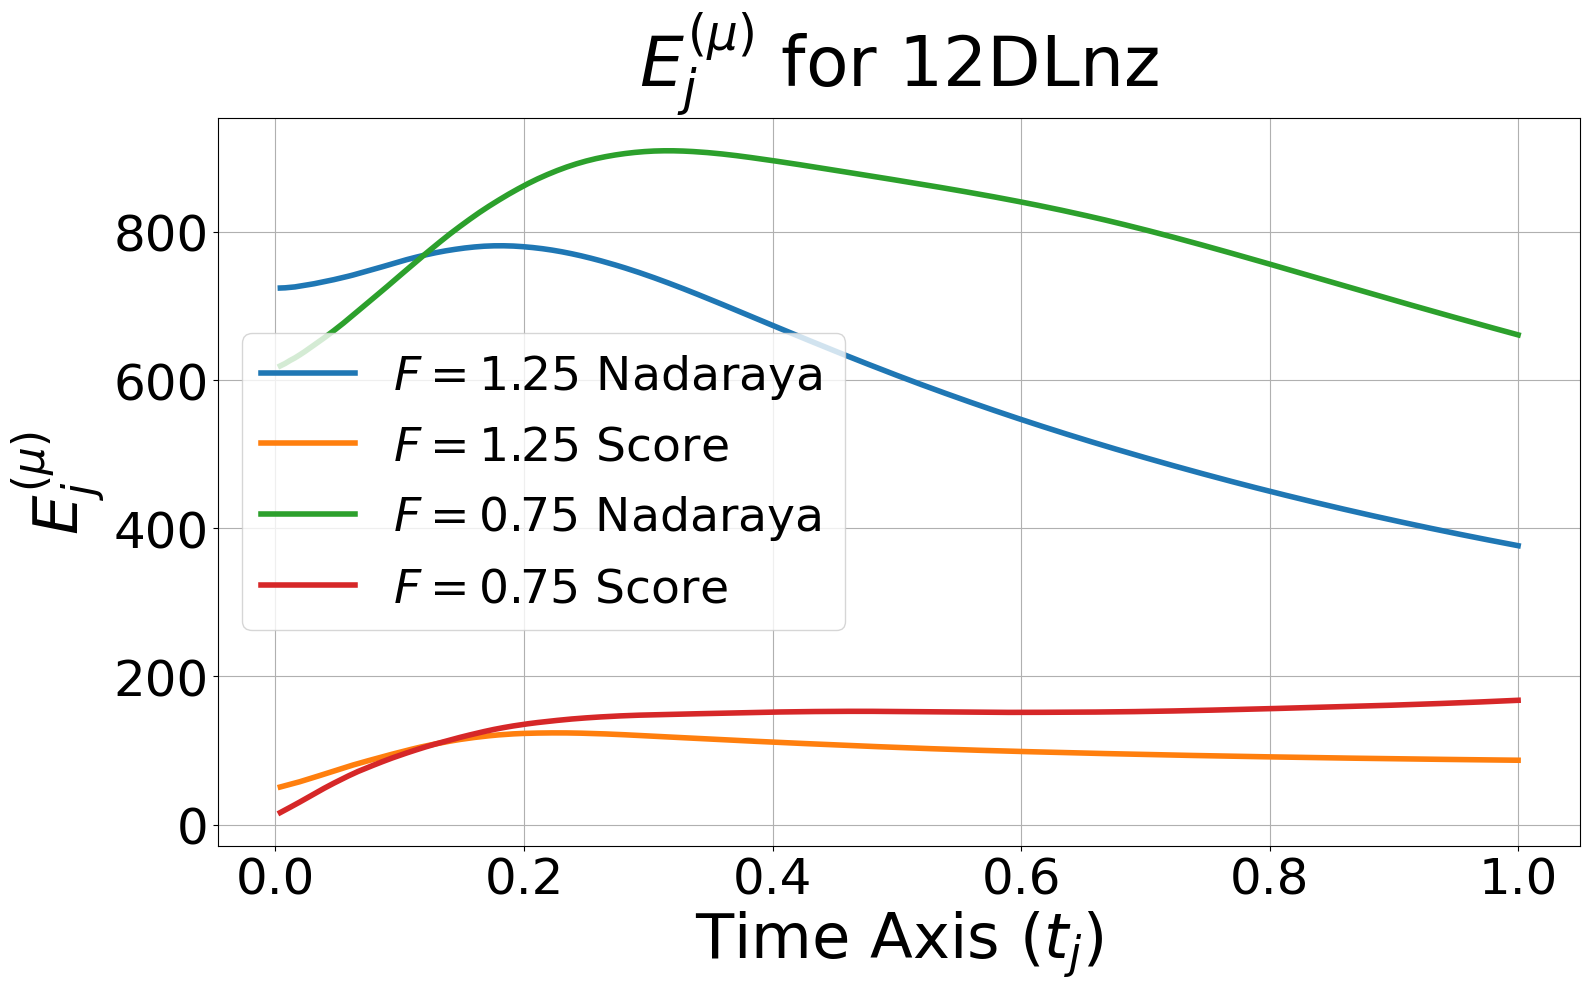

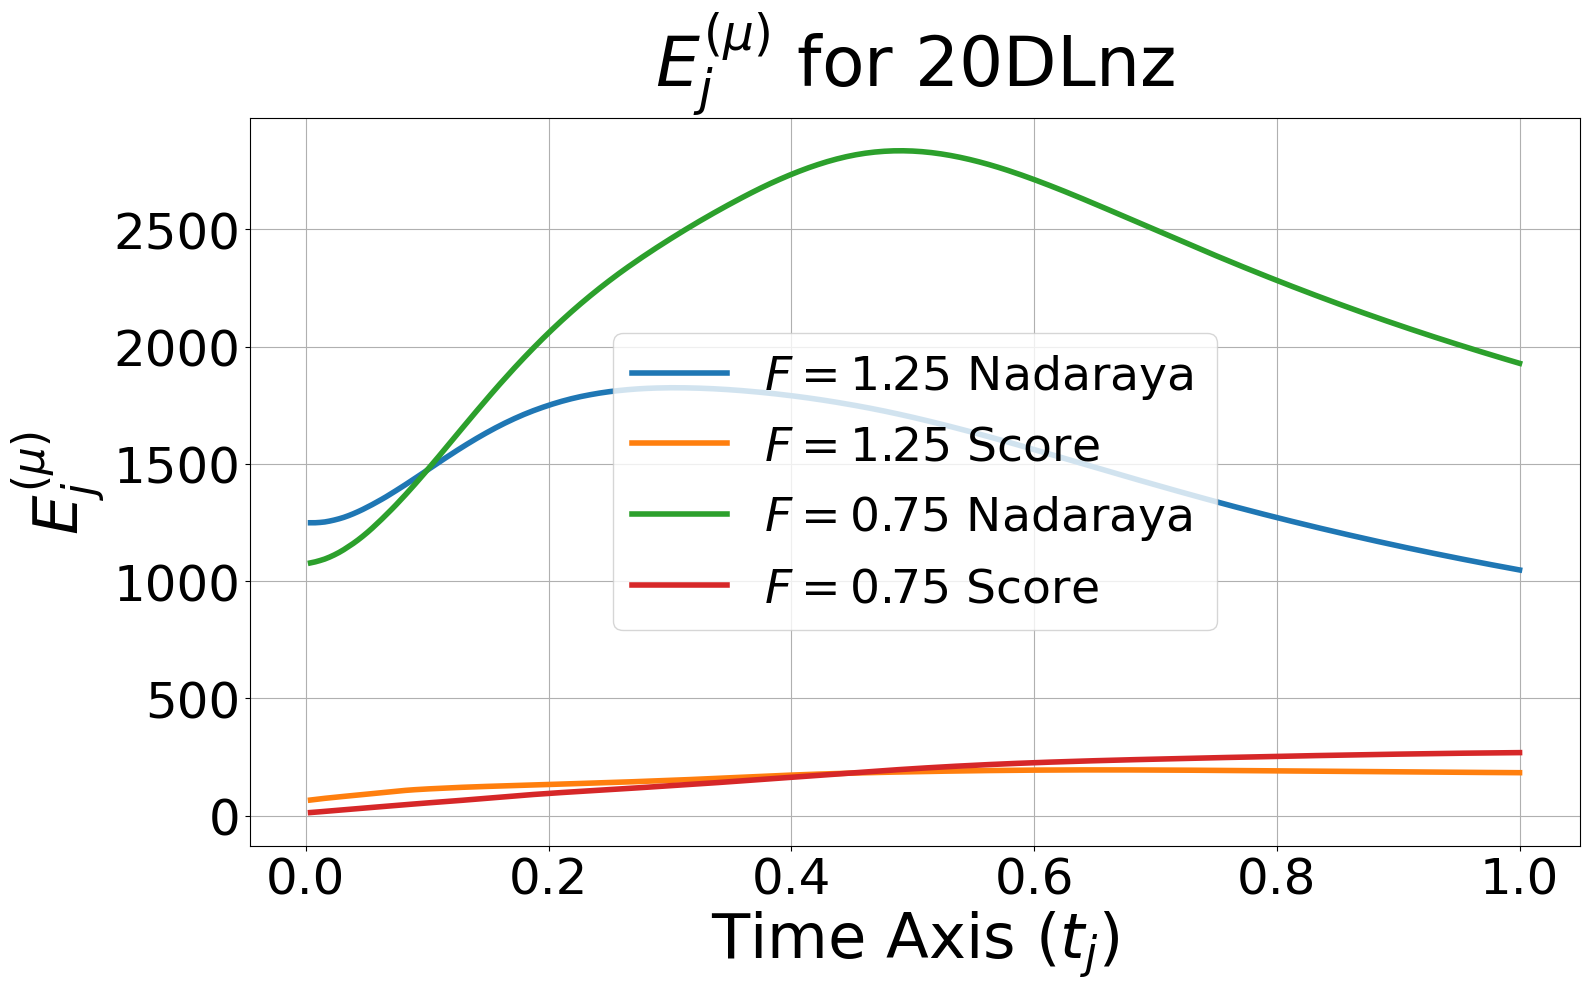

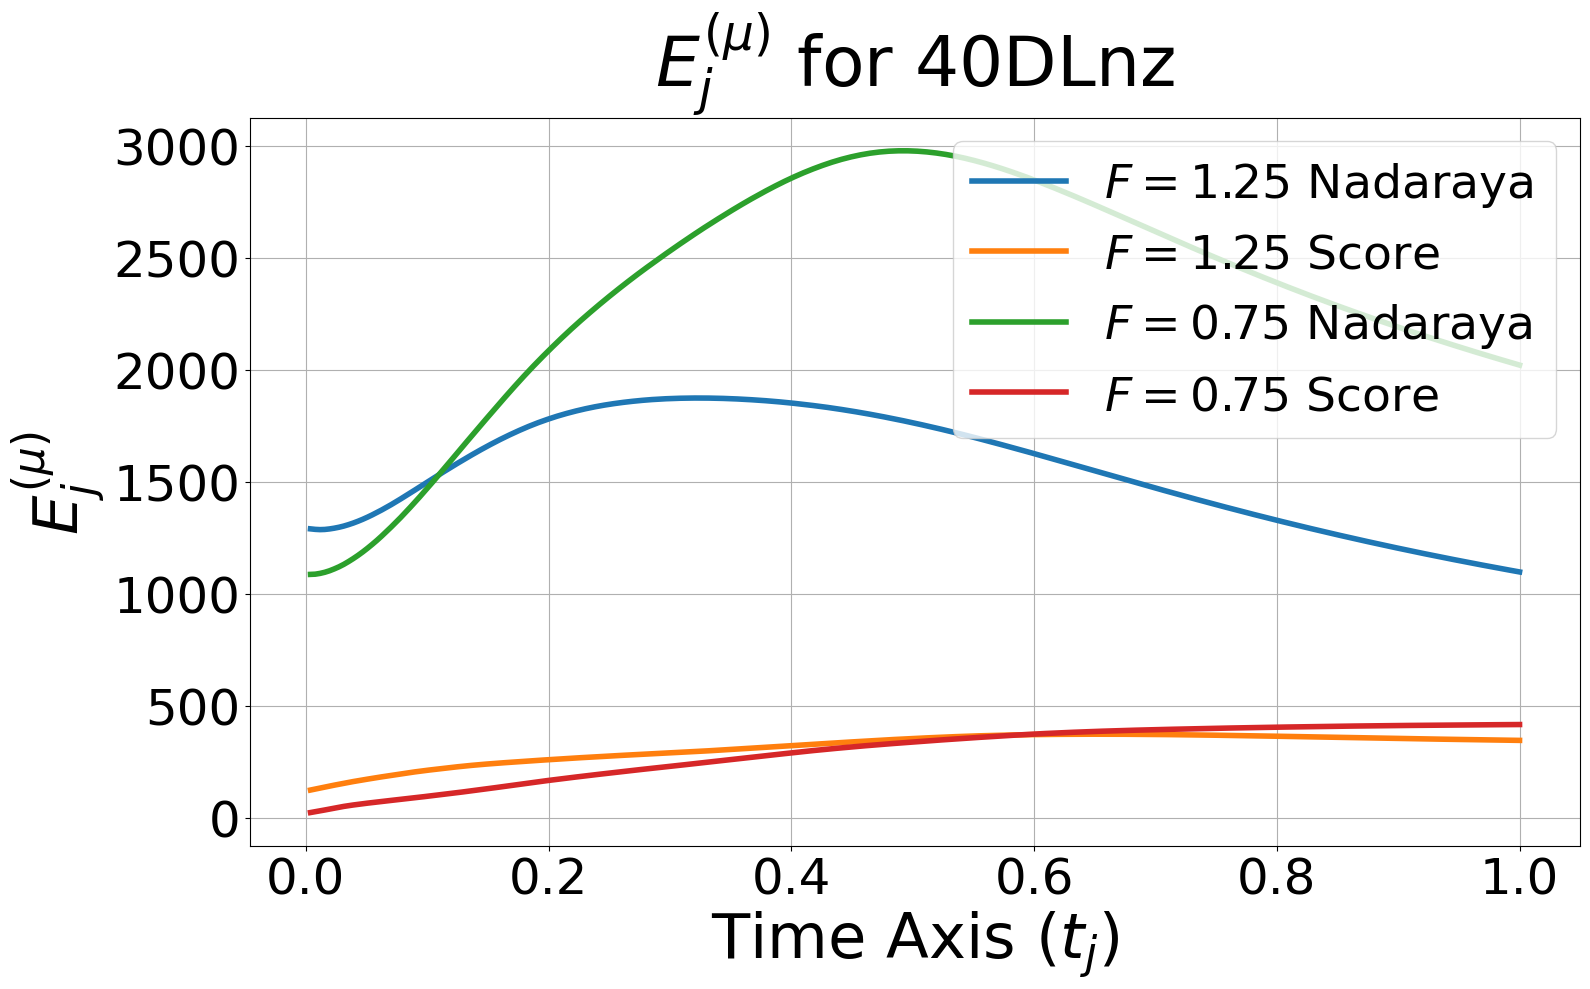

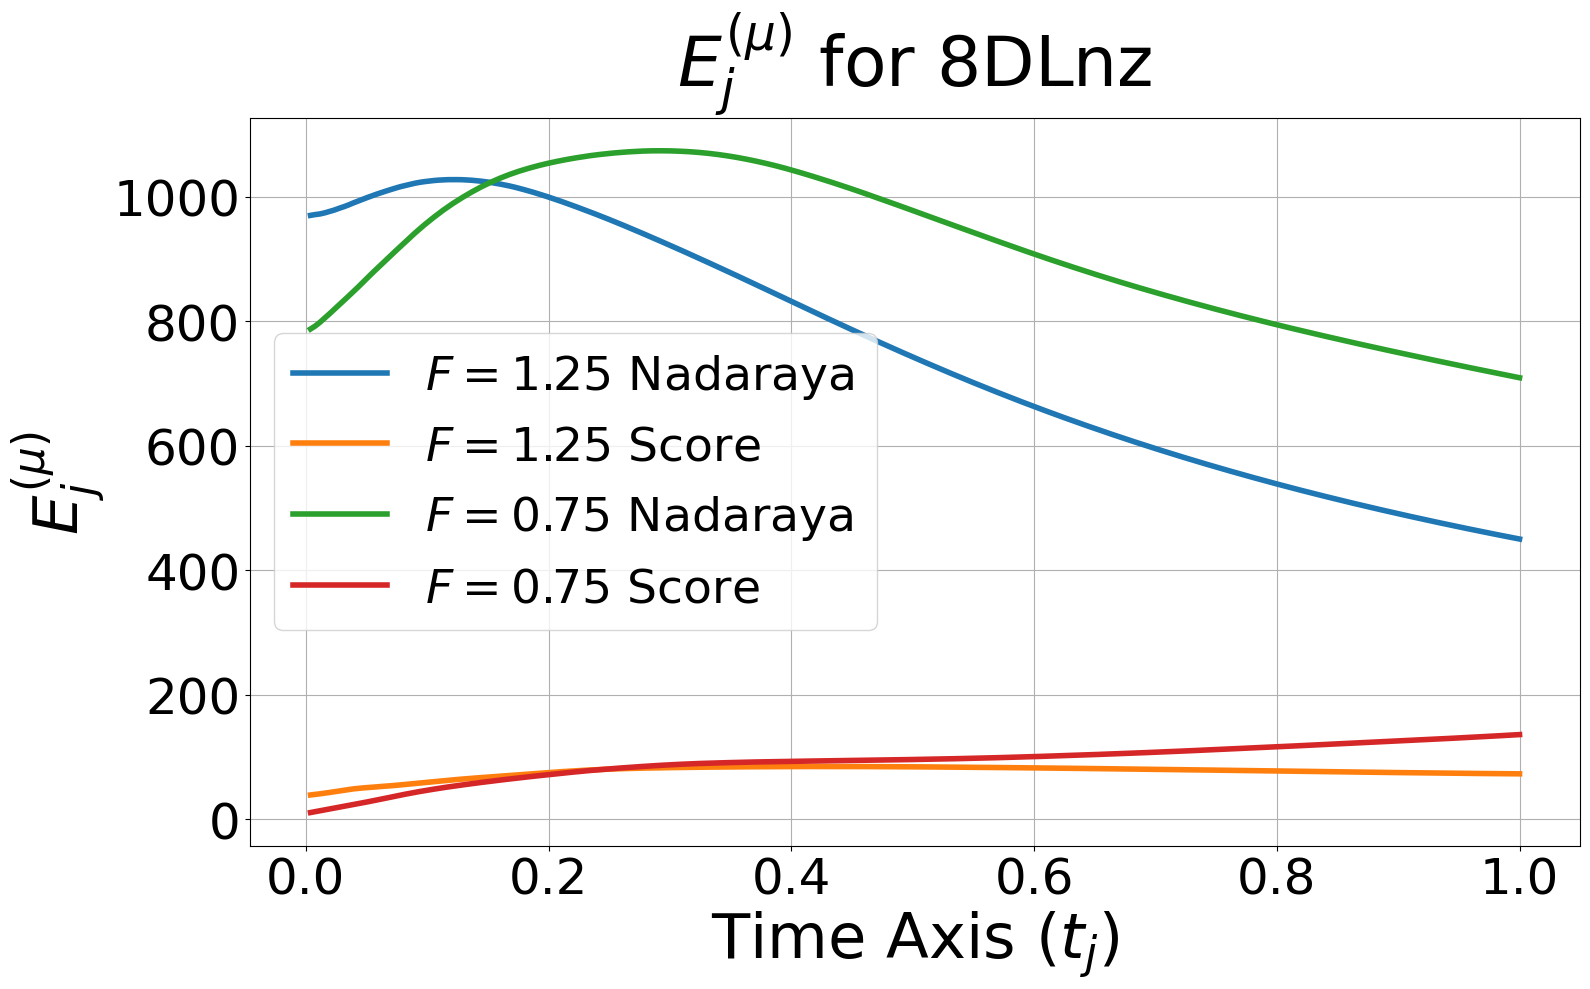

In [12]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = true_law_eval.iloc[:, k:k+4]
    d = true_law_eval.columns[k].split('DLnz')[0]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "").replace("Chaos", rf"$F=1.25$").replace("Stable", rf"$F=0.75$") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(\mu)}}_j$ for {d}DLnz", fontsize=50)
    plt.ylabel(rf"$E^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DLnzTrueLawOOS.png")
    plt.show()
    plt.close()

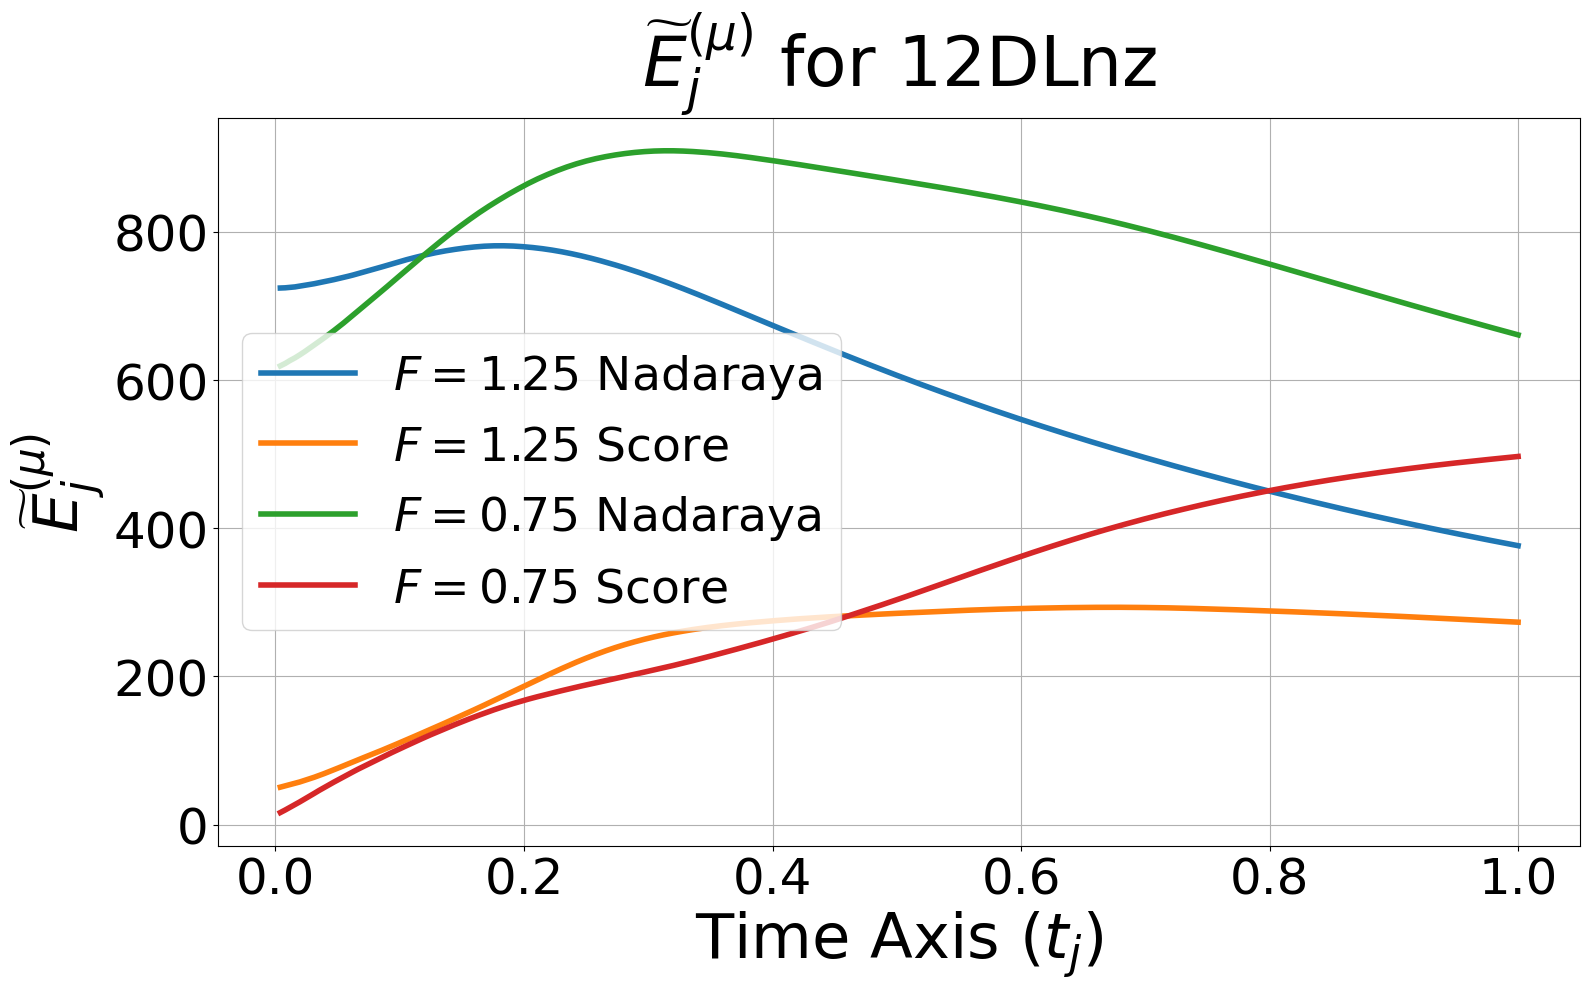

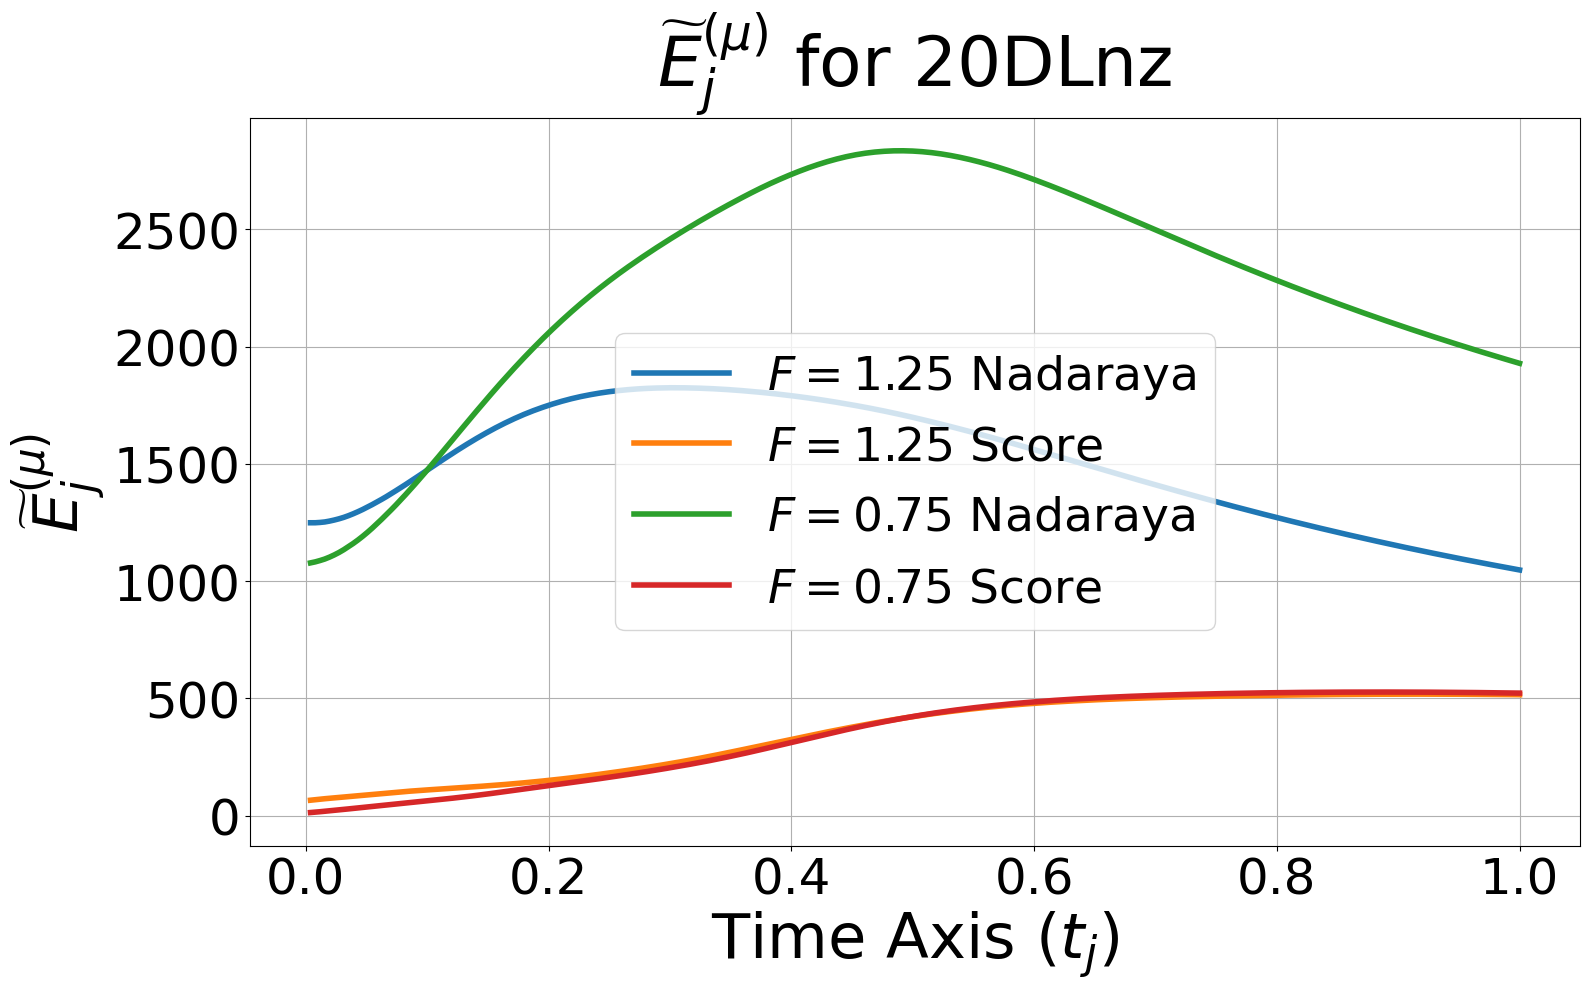

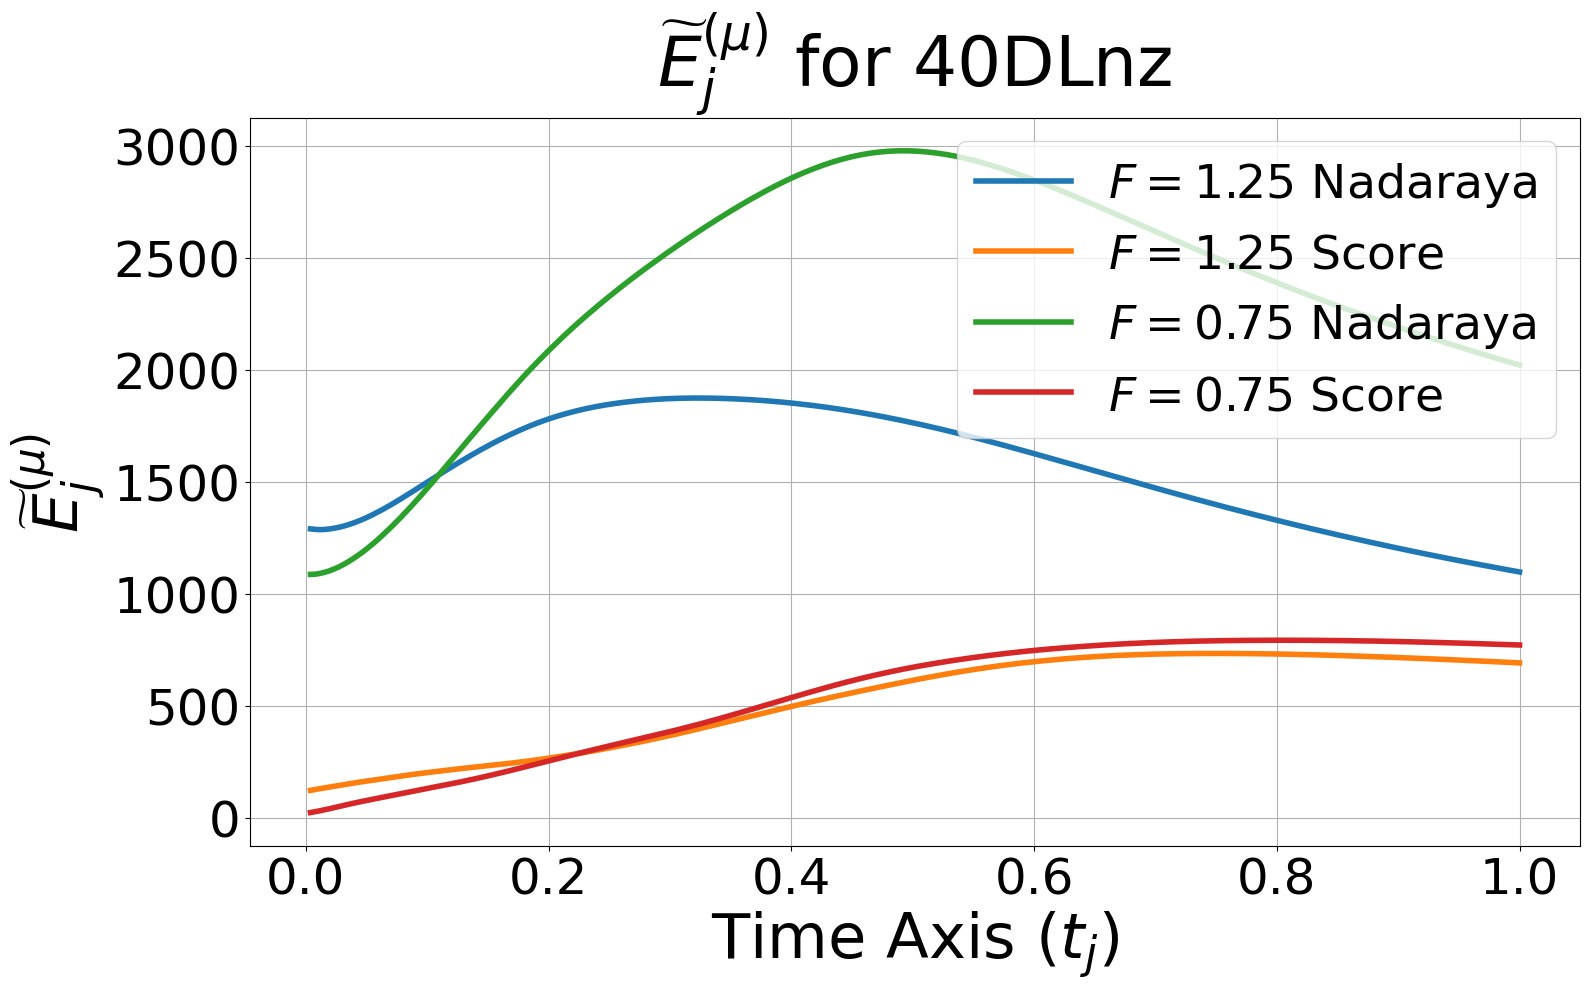

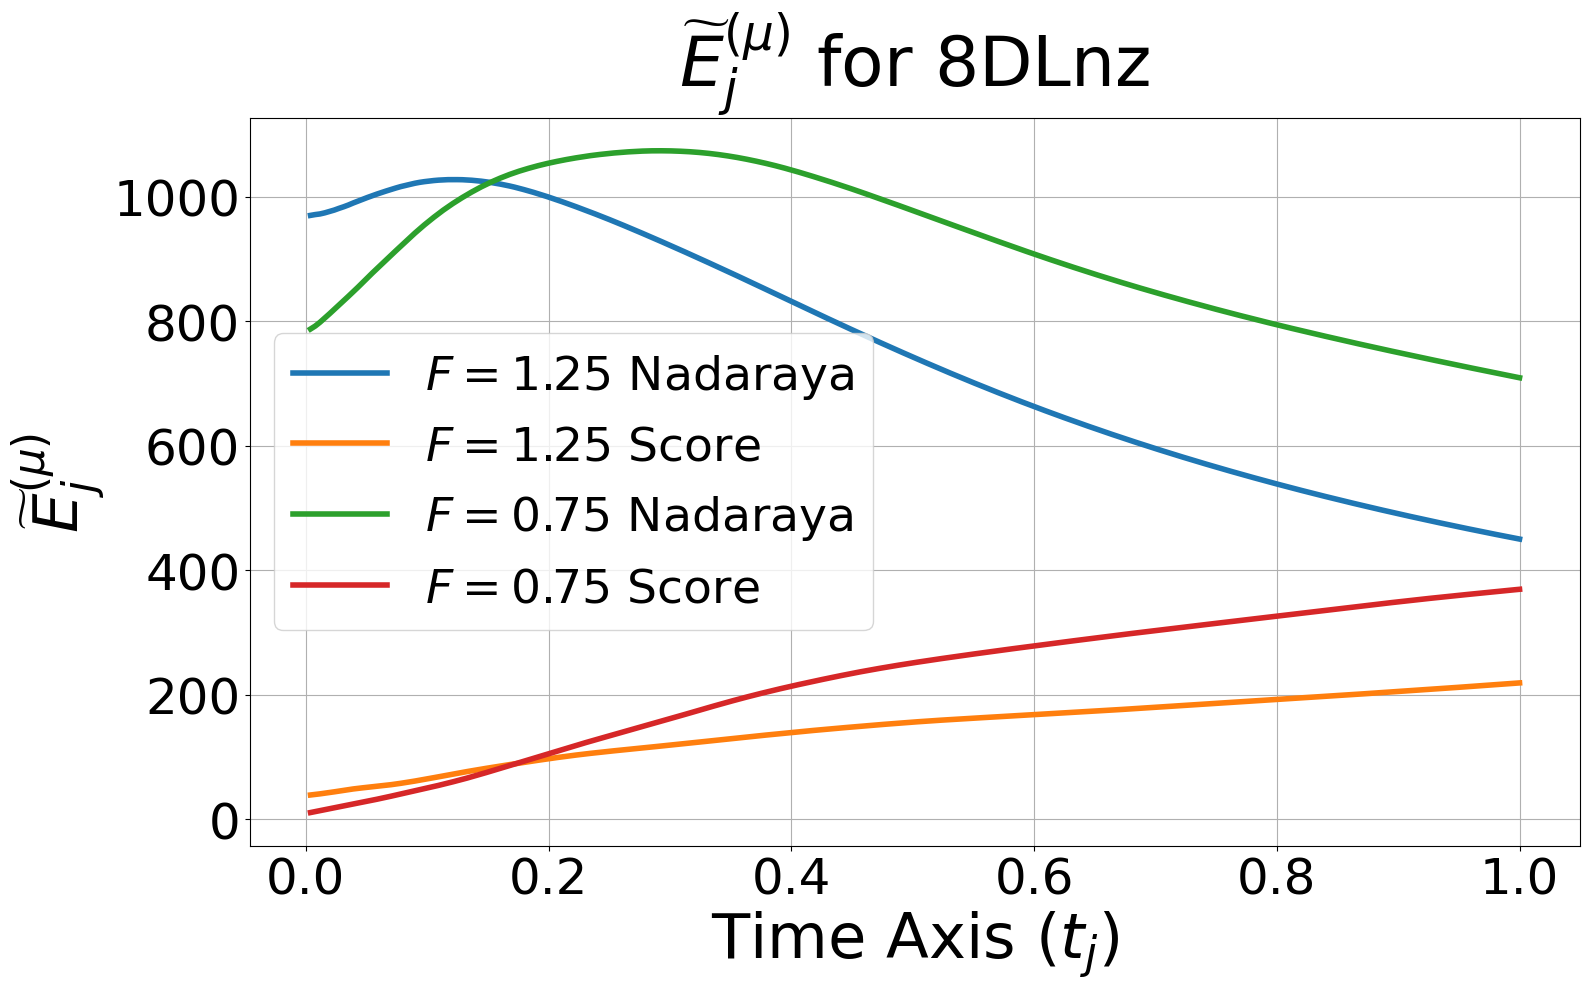

In [13]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = alt_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "").replace("Chaos", rf"$F=1.25$").replace("Stable", rf"$F=0.75$") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = alt_law_eval.columns[k].split('DLnz')[0]
    plt.title(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$ for {d}DLnz", fontsize=50)
    plt.ylabel(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DLnzAltLawOOS.png")
    plt.show()
    plt.close()

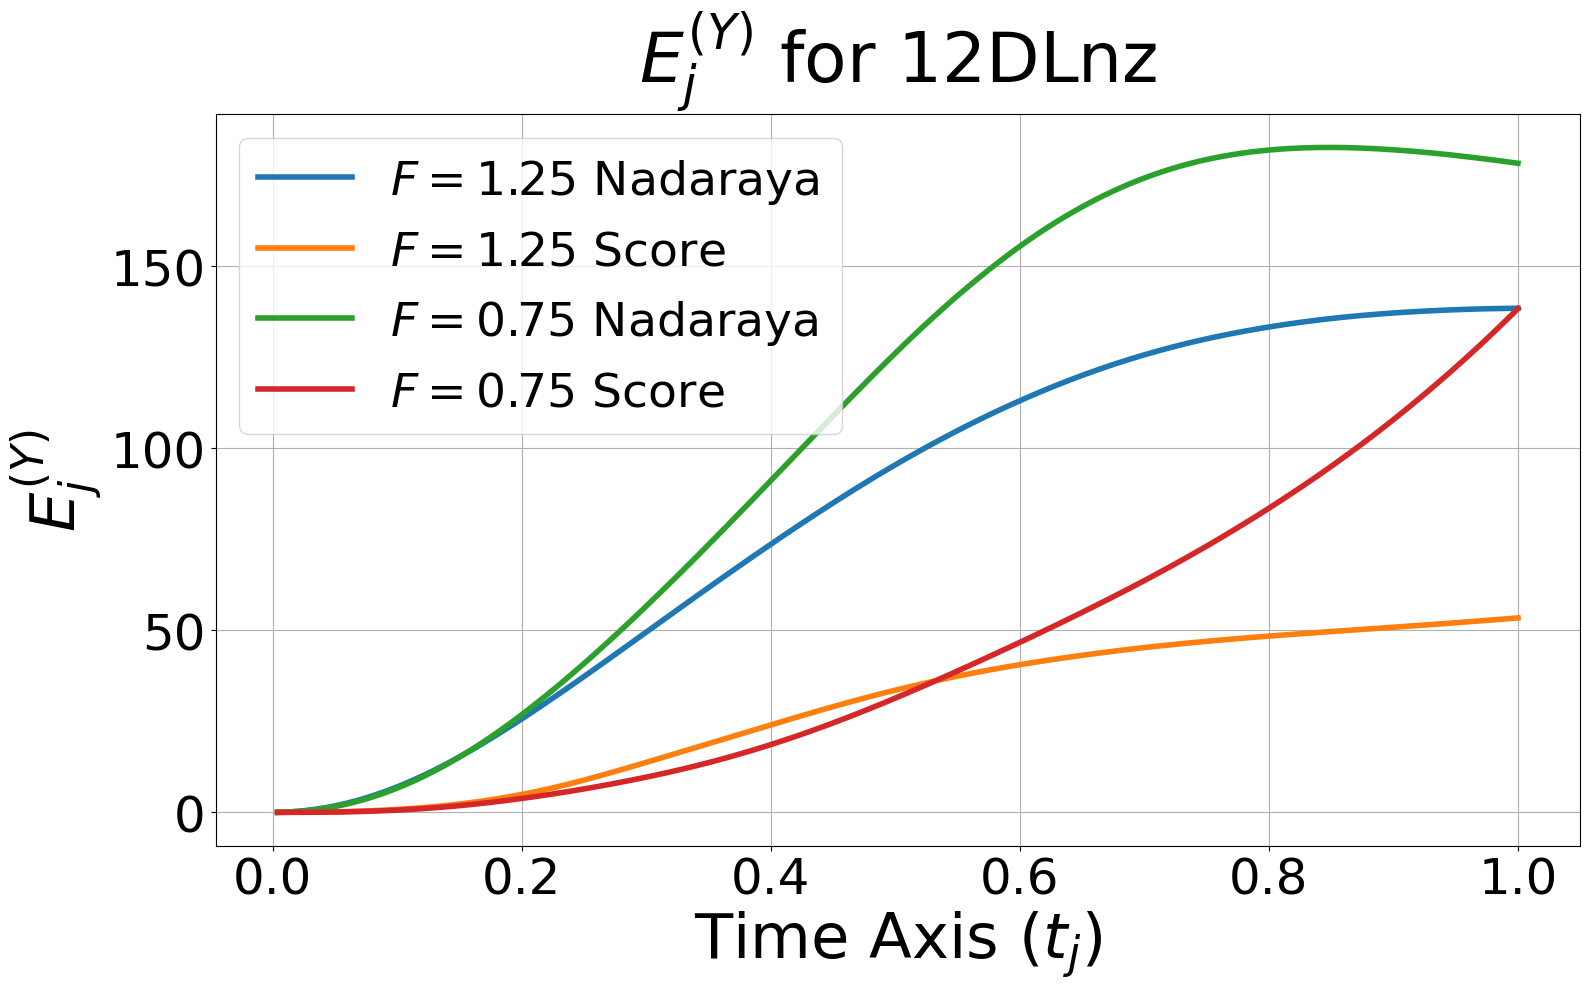

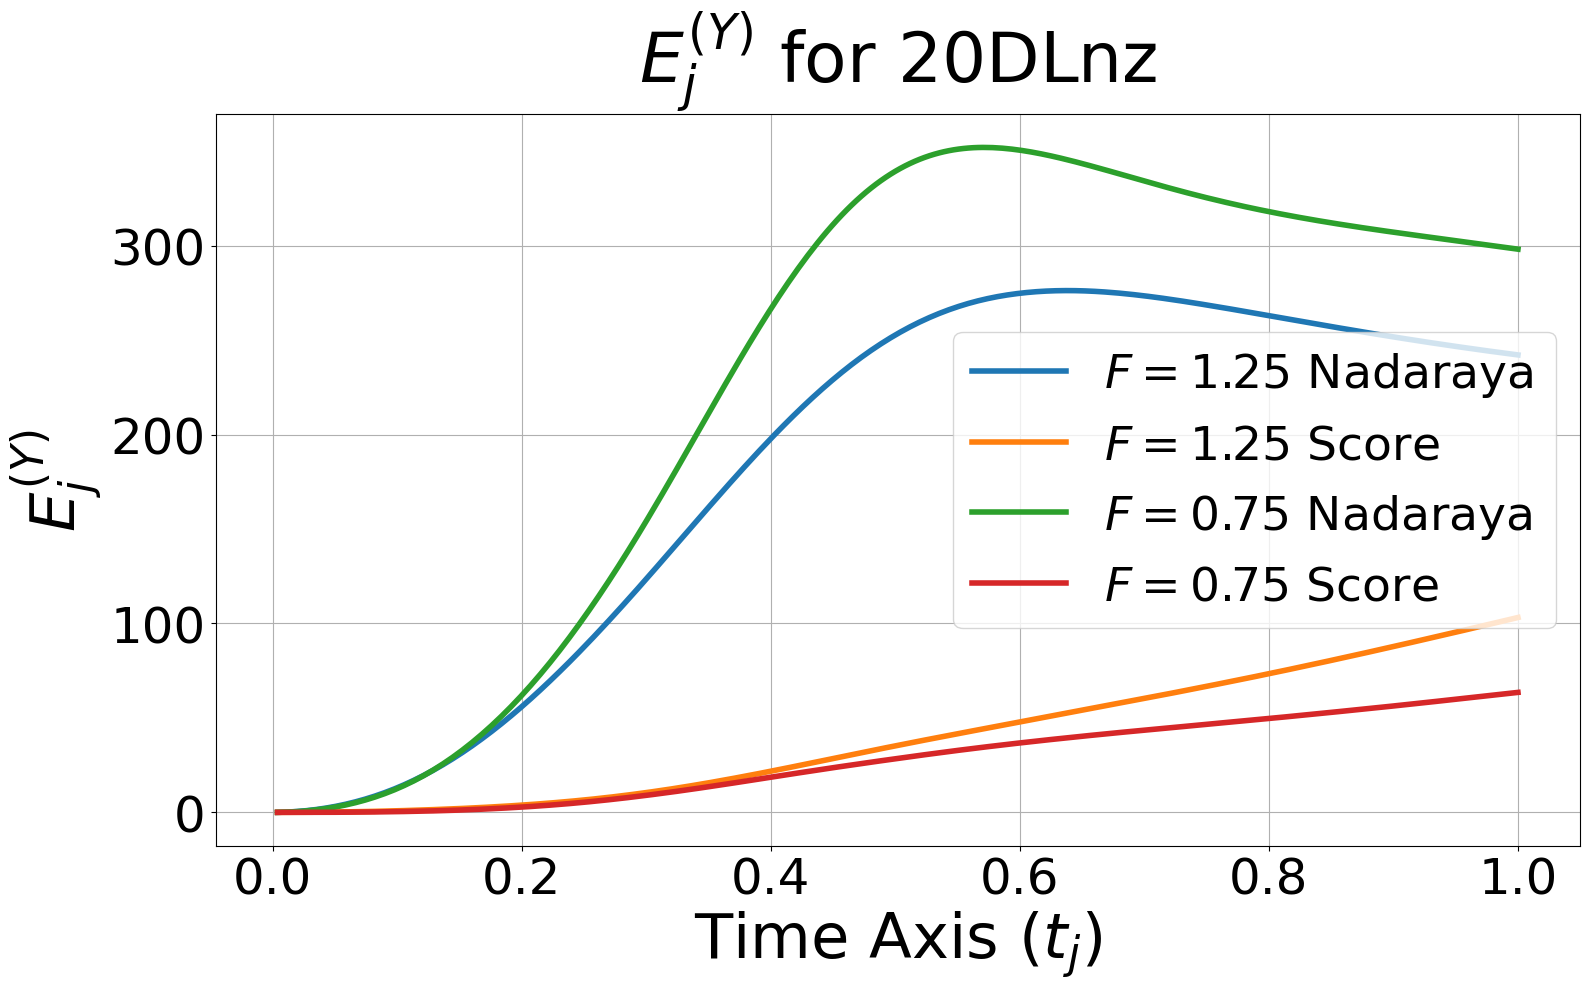

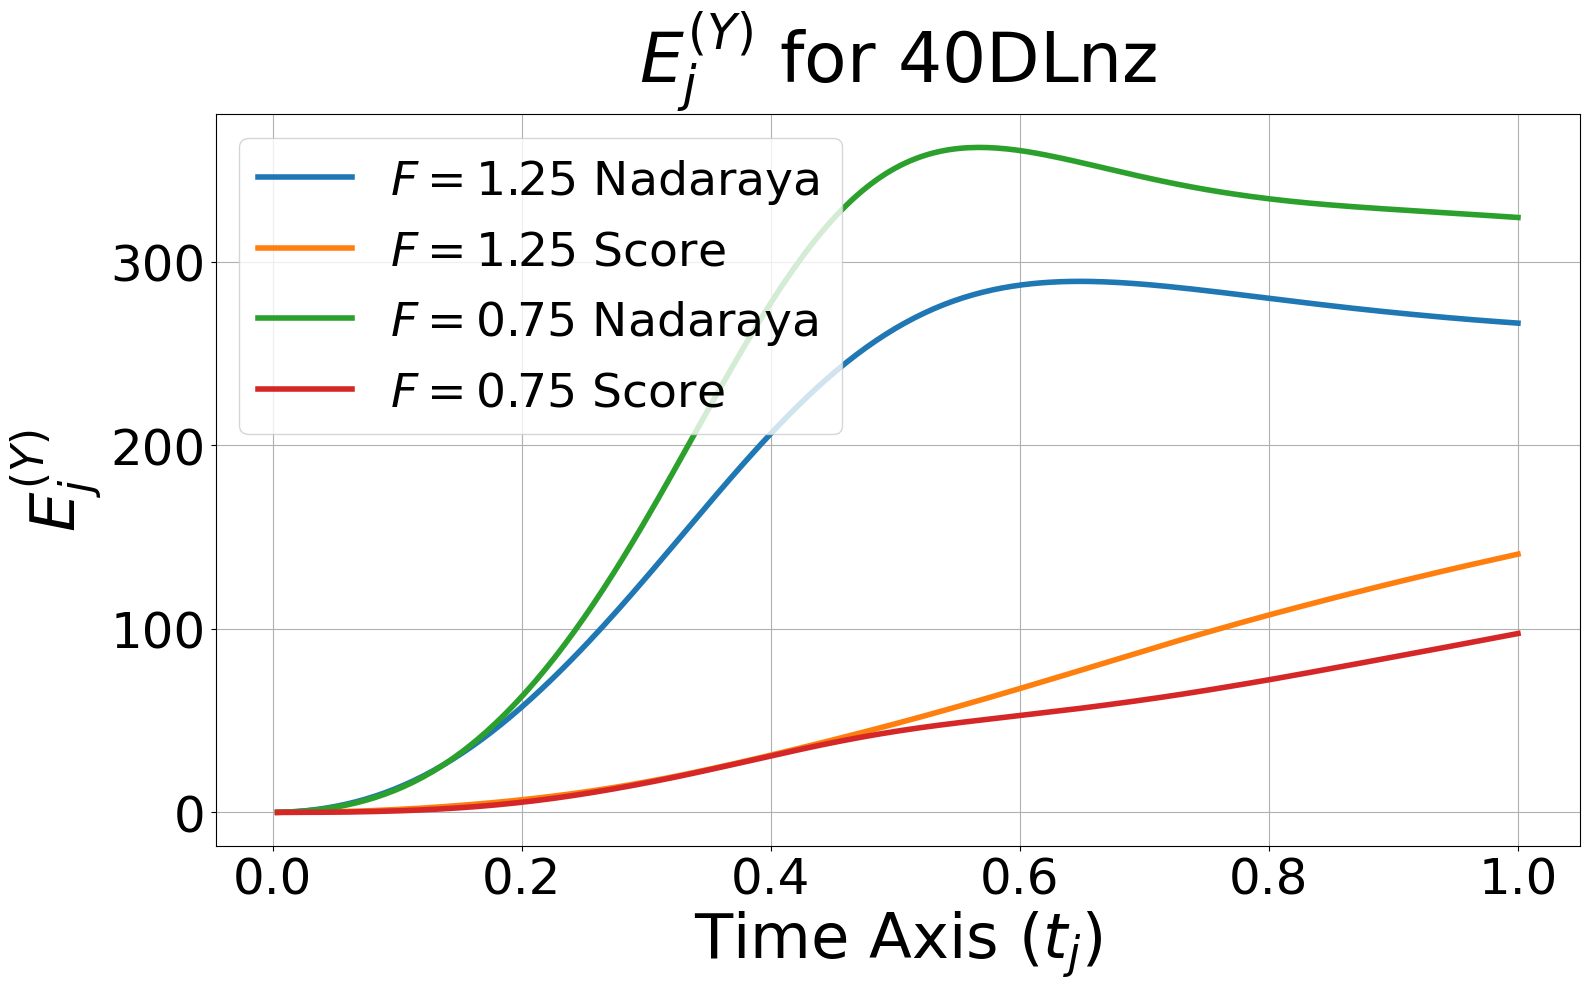

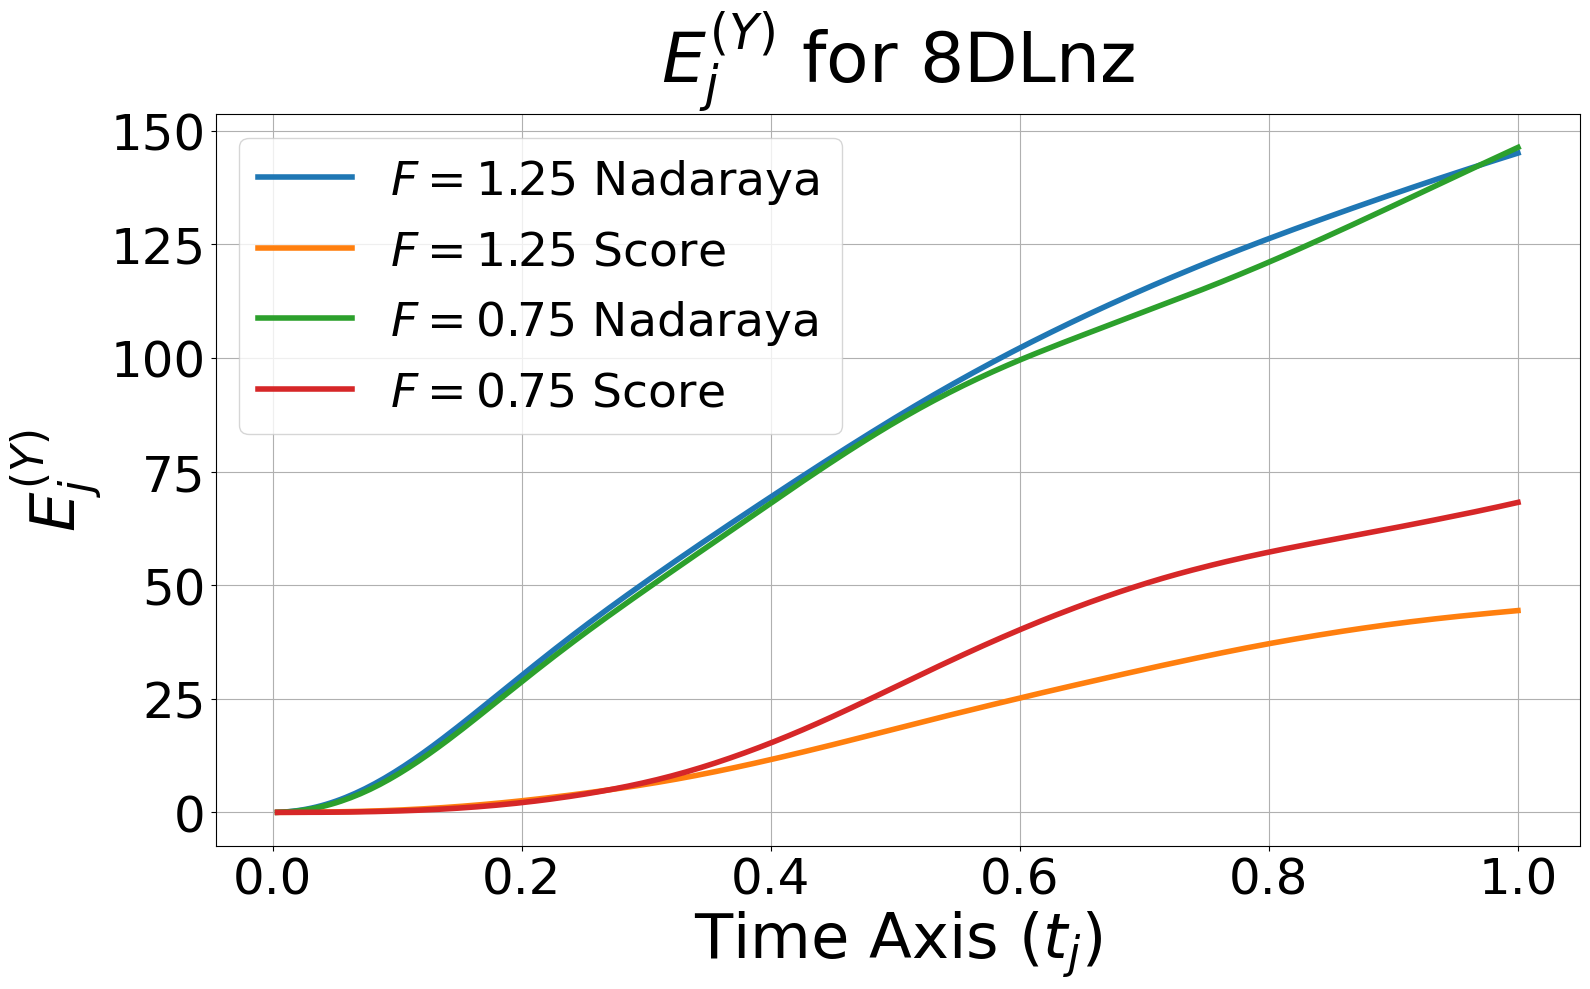

In [14]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = state_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("State", "").replace("Chaos", rf"$F=1.25$").replace("Stable", rf"$F=0.75$") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = state_eval.columns[k].split('DLnz')[0]
    plt.title(rf"$E^{{(Y)}}_j$ for {d}DLnz", fontsize=50)
    plt.ylabel(rf"$E^{{(Y)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DLnzStateErrorOOS.png")
    plt.show()
    plt.close()

In [15]:
s=(true_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DLnz')[0]))).assign(F=lambda x: x.index.map(lambda y:1.25 if "Chaos" in y else 0.75)).sort_values("F", axis=0).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("F").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))))
s.rename({s.columns[0]:""},axis=1).unstack(level=[-1,-2]).droplevel(0, axis=1).swaplevel(1,0, axis=1).round(3)

F      0.75               1.25          
T     Score _Nadaraya    Score _Nadaraya
D                                       
8   136.141   709.318   73.128   450.246
12  167.737   660.958   86.802   376.409
20  268.557  1929.161  182.966  1047.752
40  415.350  2021.041  344.572  1097.032

In [16]:
s=(alt_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DLnz')[0]))).assign(F=lambda x: x.index.map(lambda y:1.25 if "Chaos" in y else 0.75)).sort_values("F", axis=0).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("F").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))))
s.rename({s.columns[0]:""},axis=1).unstack(level=[-1,-2]).droplevel(0, axis=1).swaplevel(1,0, axis=1).round(3)

F      0.75               1.25          
T     Score _Nadaraya    Score _Nadaraya
D                                       
8   369.572   709.318  219.205   450.246
12  496.824   660.958  273.156   376.409
20  522.400  1929.161  515.616  1047.752
40  770.691  2021.041  690.870  1097.032

In [17]:
s=(state_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DLnz')[0]))).assign(F=lambda x: x.index.map(lambda y:1.25 if "Chaos" in y else 0.75)).sort_values("F", axis=0).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("F").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))))
s.rename({s.columns[0]:""},axis=1).unstack(level=[-1,-2]).droplevel(0, axis=1).swaplevel(1,0, axis=1).round(3)

F      0.75               1.25          
T     Score _Nadaraya    Score _Nadaraya
D                                       
8    68.218   146.333   44.412   145.093
12  138.397   178.320   53.424   138.491
20   63.520   298.172  103.168   242.187
40   97.421   324.022  140.652   266.487